# Network from skeleton demo
Module designed to extract a network (as networkx graph, see [MultiGraph doc](https://networkx.org/documentation/stable/reference/classes/multigraph.html)) from a skeletonized array (such as the output of scikit-image skeletonize function for instance, see [Skeletonize doc](https://scikit-image.org/docs/stable/auto_examples/edges/plot_skeleton.html)). Skeleton input being a binary array where zeros represent the background and ones represent a single-pixel wide skeleton. 

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from network_from_skeleton import *

In [2]:
example = np.array([
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0],
    [0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0],
    [0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0],
    [0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0],
    [0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0],
    [1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0],
    [1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0],
    [0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1],
    [0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1],
    [0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1],
    [0,0,0,0,0,1,1,1,1,1,0,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0],
    [0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0],
    [0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1],
])

Let's take a look at our skeleton example.

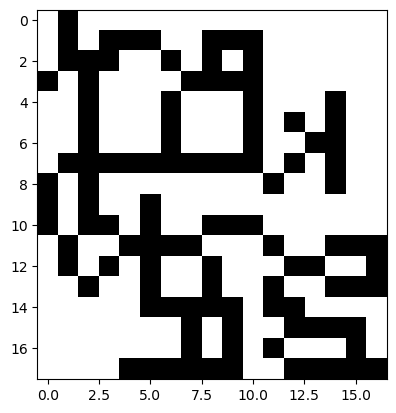

In [3]:
plt.imshow(example, cmap=plt.cm.binary)

Now extract the network.

In [4]:
G = network_from_skeleton(example)

And visualize the result:

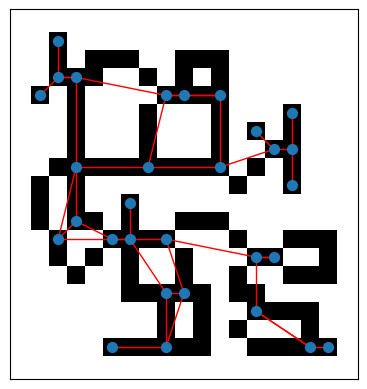

In [5]:
pos=nx.get_node_attributes(G,'pos')
fig, ax = plt.subplots()
plt.imshow(example, cmap=plt.cm.binary)
nx.draw_networkx_nodes(G,pos, node_size = 50, ax = ax)
nx.draw_networkx_edges(G,pos, edge_color = "red", ax = ax)

Note that the visualization of edges (connections between nodes) by red lines is here only topological (which node connected to which node(s)) but they are weighted by the real length of the "following-network" lines, even if they are not visible on the plot (see "weight" edge attributes). Useful for calculating routing operations for example.

Then we can leverage everything from networkx library, shortest path between two points for instance.

In [6]:
source = (14,4)
target = (4,17)
source_key = [k for k, v in pos.items() if v == source][0]
target_key = [k for k, v in pos.items() if v == target][0]

In [7]:
shortest_path = nx.shortest_path(G, source = source_key, target = target_key, weight="weight", method='dijkstra')

And visualize the result:

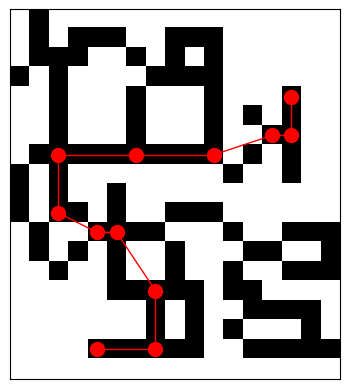

In [8]:
H = nx.subgraph(G, shortest_path)
pos2=nx.get_node_attributes(H,'pos')
fig, ax = plt.subplots()
plt.imshow(example, cmap=plt.cm.binary)
nx.draw_networkx_nodes(H ,pos2, node_size = 100, node_color='red', ax = ax)
nx.draw_networkx_edges(H,pos, edge_color = "red", ax = ax)